# The Sparks Foundation

## Data Science and Business Analysis Internsip #Task1

### Topic - Predict the percentage of a student based on the number of study hours. 

Linear Regression model involving 2 variables

## Author : Shraawani Lattoo

#### Importing libraries

In [45]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

#### Reading data from remote link

In [7]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
df.shape

(25, 2)

#### Visualising the graph to figure out the relationship between the two data points.

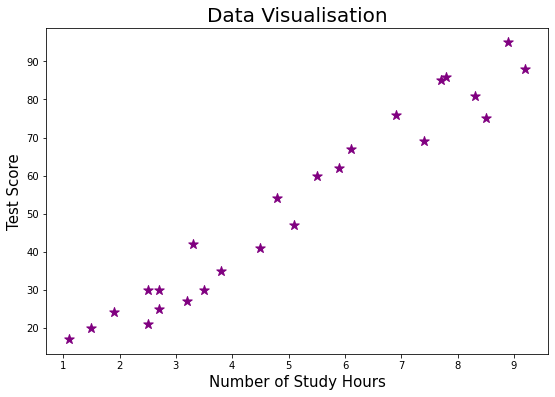

In [79]:
plt.figure(figsize=(9,6))
plt.scatter(df["Hours"],df["Scores"],marker='*',color='purple',s=100)
plt.title("Data Visualisation",fontsize=20)
plt.xlabel("Number of Study Hours",fontsize=15)
plt.ylabel("Test Score",fontsize=15)
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

<AxesSubplot:>

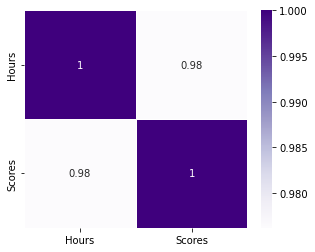

In [64]:
colormap=plt.cm.Blues
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),cmap='Purples',annot=True,linewidth=0.9)

##### The correlation plot suggests that the 2 variables under study are positively highly correlated

### Preparing the data

##### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [68]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

In [66]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [69]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

##### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [73]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

### Training the Algorithm

##### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [85]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 
Y_pred = regressor.predict(X_test)
print("Training complete.")

Training complete.


#### Visualising the training results with regression line

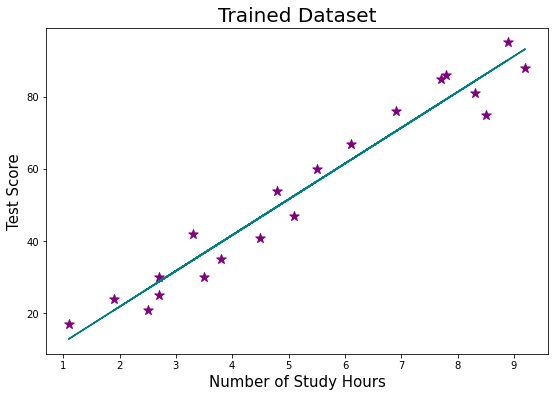

In [83]:
plt.figure(figsize=(9,6))
m=regressor.coef_
b=regressor.intercept_
line = m*X_train+b
plt.scatter(X_train, Y_train,marker='*',s=100,color='purple')
plt.plot(X_train, line,color="teal")
plt.title("Trained Dataset",fontsize=20)
plt.xlabel("Number of Study Hours",fontsize=15)
plt.ylabel("Test Score",fontsize=15)
plt.show()


In [86]:
df2 = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [87]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Testing

##### Error

In [91]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred)) 

Mean Absolute Error: 4.183859899002975


#### Question

##### What will be the predicted score if the student studies for 9.25 hrs/day?

In [95]:
hours=[[9.25]]           #as passing array 
pred=regressor.predict(hours)
print(pred)

[93.69173249]


## If a student studies for 9.25 hours per day then he scores 93.69%.

## Thank You